# Wildfire Image Classification

Wildfire image classification is a critical problem that needs to be addressed as it can help in early detection and management of wildfires, which can lead to reduced damage to property and lives. With the increasing frequency and severity of wildfires, the development of accurate and efficient wildfire image classification systems is crucial for quick and effective response. These systems use computer vision and machine learning techniques to analyze images from satellites, drones, or other sources, and classify them as fire or no-fire. This can help in identifying the location, size, and severity of the wildfire, and aid in decision making for firefighting and evacuation efforts.

## Project and data overview

An image classification project that aims to distinguish between images of fire and images without fire is a crucial task for early detection and management of wildfires. This project uses computer vision and machine learning techniques to analyze images from various sources such as drones, and cameras.

The dataset used for training the model includes a diverse set of images of both fire and non-fire scenes, such as forests and other landscapes and it is available to download from [Kaggle](https://www.kaggle.com/datasets/brsdincer/wildfire-detection-image-data).

## Inspect the data

Let's examine the data and become familiar with the layout of the directories.

In [1]:
# Required libraries
import os
import cv2
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from skimage.feature import blob_log, blob_dog, blob_doh

In [2]:
# Walk through forest_fire directory and list number of file
for path, dirs, files in os.walk('../dataset/forest_fire'):
    print(f"There are {len(dirs)} directories and {len(files)} images in '{path}'.")

There are 2 directories and 0 images in '../dataset/forest_fire'.
There are 2 directories and 0 images in '../dataset/forest_fire\testing'.
There are 0 directories and 22 images in '../dataset/forest_fire\testing\fire'.
There are 0 directories and 46 images in '../dataset/forest_fire\testing\nofire'.
There are 2 directories and 0 images in '../dataset/forest_fire\training_and_validation'.
There are 0 directories and 928 images in '../dataset/forest_fire\training_and_validation\fire'.
There are 0 directories and 904 images in '../dataset/forest_fire\training_and_validation\nofire'.


Example of file structure:

```
forest_fire <- top level folder
└───training_and_validation <- training images
│   └───nofire
│   │   │   abc191.jpg
│   │   │   abc192.jpg
│   │   │   ...      
│   └───fire
│       │   abc001.jpg
│       │   abc002.jpg
│       │   ...
│   
└───testing <- testing images
│   └───nofire
│   │   │   abc335.jpg
│   │   │   abc336.jpg
│   │   │   ...      
│   └───fire
│       │   abc169.jpg
│       │   abc170.jpg
│       │   ... 
```

In [3]:
# Create train and test directories path
train_dir = '../dataset/forest_fire/training_and_validation'
test_dir = '../dataset/forest_fire/testing'

In [4]:
# Get the class names for forest_fire dataset
import numpy as np
from pathlib import Path

class_dir = Path(train_dir)
class_names = np.array(sorted([item.name for item in class_dir.glob('*')]))
print(class_names)

['fire' 'nofire']


In [5]:
# Count the total number of images in the train directory
train_count = 0
for root, dirs, files in os.walk(train_dir):
    for file in files:
        if file.endswith('.jpg') or file.endswith('.png'):
            train_count += 1
print(f'Total number of images in the train directory: {train_count}')

Total number of images in the train directory: 1832


In [6]:
# Count the total number of images in the test directory
test_count = 0
for root, dirs, files in os.walk(test_dir):
    for file in files:
        if file.endswith('.jpg') or file.endswith('.png'):
            test_count += 1
print(f'Total number of images in the test directory: {test_count}')

Total number of images in the test directory: 68


Of the `1900` total images, `1832` images are designated for training and validation, while `68` images are reserved for testing.

Let's find the images distribution in each class in train and test directories

In [7]:
# Get the images distribution in each class in train directory
for i in class_names:
    print(f"Training {i} images are {len(os.listdir(train_dir+'/'+i+'/'))}")

Training fire images are 928
Training nofire images are 904


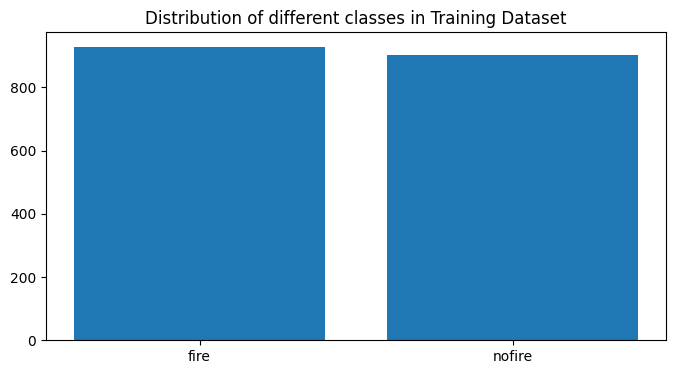

In [8]:
# Count images in each class directory (train)
num_imgs = {}
for i in class_names:
    images_count = len(os.listdir(train_dir+'/'+i+'/'))
    num_imgs[i] = images_count

# Plot distribution
plt.figure(figsize=(8, 4))
plt.bar(np.arange(len(num_imgs)), list(num_imgs.values()), align='center')
plt.xticks(np.arange(len(num_imgs)), list(num_imgs.keys()))
plt.title('Distribution of different classes in Training Dataset')

plt.show()

In [9]:
# Get the images distribution in each class in test directory
for i in class_names:
    print(f"Test {i} images are {len(os.listdir(test_dir+'/'+i+'/'))}")

Test fire images are 22
Test nofire images are 46


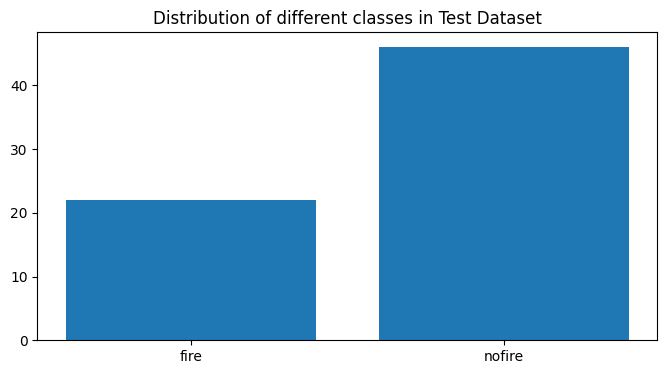

In [10]:
# Count images in each class directory (test)
num_imgs = {}
for i in class_names:
    images_count = len(os.listdir(test_dir+'/'+i+'/'))
    num_imgs[i] = images_count

# Plot distribution
plt.figure(figsize=(8, 4))
plt.bar(np.arange(len(num_imgs)), list(num_imgs.values()), align='center')
plt.xticks(np.arange(len(num_imgs)), list(num_imgs.keys()))
plt.title('Distribution of different classes in Test Dataset')

plt.show()

The number of images for the `fire` class in the training and validation directory (928) is slightly higher than the number of images for the `nofire` class (904), whereas in the test directory, the number of images for the `fire` class (22) is less than the number of images for the `nofire` class (46).

In [11]:
# Function to display random image
def plot_random_image(target_dir, target_class):
    # Setup target directory
    target_folder = target_dir + '/' + target_class
    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)[0] # reads from list of images and randomly sample them

    # Read in the image and plot it using matplotlib
    filename = target_folder + '/' + random_image # return an image file name
    img = mpimg.imread(filename)
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')

    return img

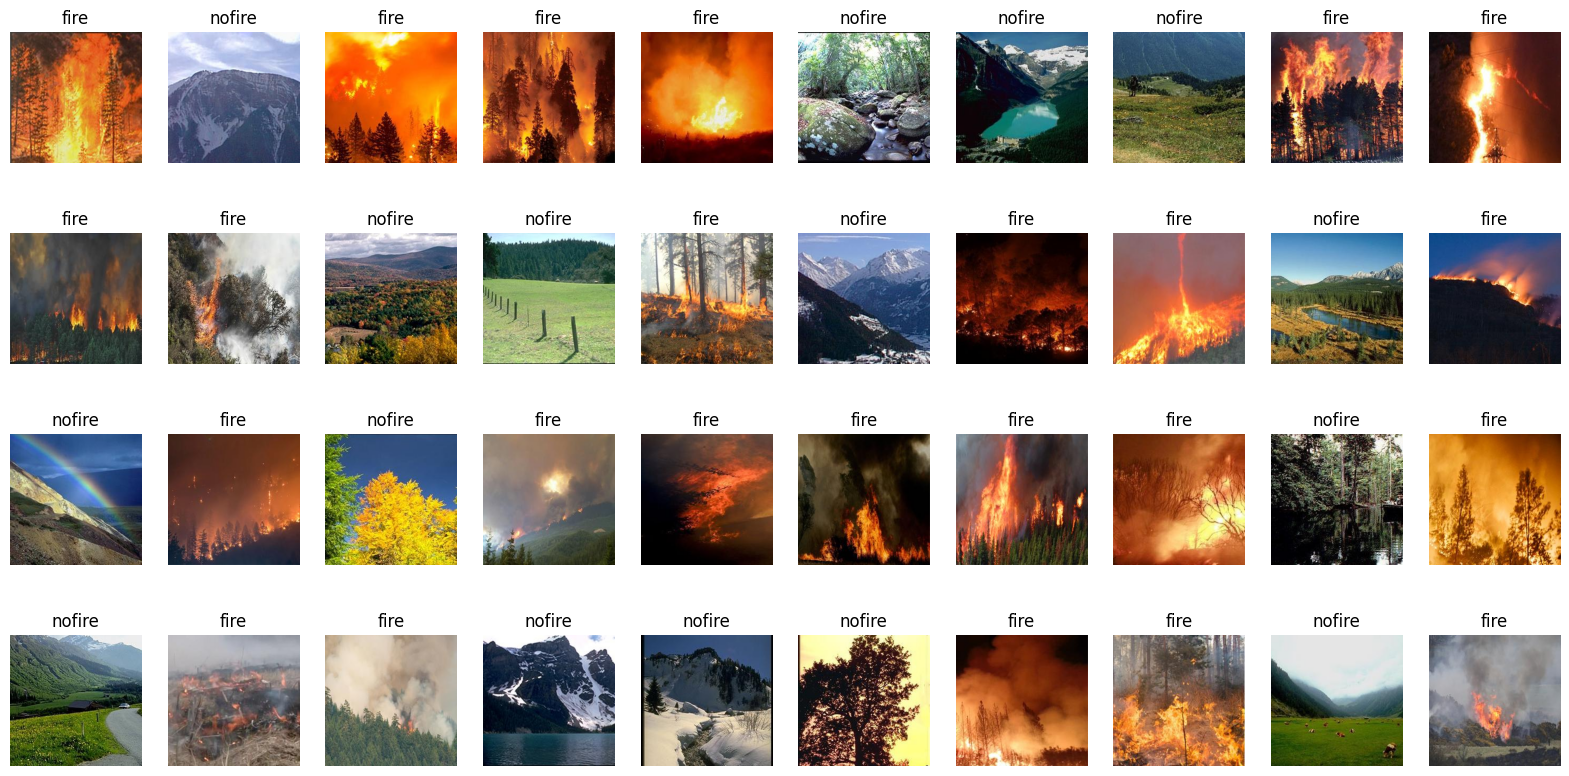

In [12]:
# Visualize random images from both classes (fire, nofire)
fig = plt.figure(figsize=(20,10))
rows = 4
cols = 10
for i in np.arange(1, rows*cols+1):
    fig.add_subplot(rows, cols, i)
    img = plot_random_image(target_dir=train_dir,
                            target_class=random.choice(class_names))

## Image analysis using Blob detection

Blob detection is a technique that can be used to identify and locate regions of wildfire in images. It is a powerful tool that can help in the early detection and monitoring of wildfires by automatically identifying the presence of fire in images. The technique can be used to detect fire by analyzing the brightness in the dark background regions in the image and identifying regions that have a distinct pattern or characteristics associated with fire. Additionally, blob detection can also be used to monitor the spread of wildfire over time by comparing images captured at different times.

Scikit-Image has different functions that can be used to show the different blob in an image. Let us go through each of them.

Let us first load the example image:

In [13]:
# Function to plot random image of wildfire
def random_fire_image_converter(target_dir, target_class='fire'):
    # Target fire directory
    target_folder = target_dir + '/' + target_class
    # Get a list of all image files in the target directory
    image_files = [f for f in os.listdir(target_folder) if f.endswith('.jpg') or f.endswith('.png')]
    # Select a random image file from the list
    random_image = random.choice(image_files)
    # Construct the full path to the image file
    random_image_path = os.path.join(target_folder, random_image)

    # Read the image
    image = cv2.imread(random_image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # change color channels

    # Check if image is loaded successfully
    if image is None:
        print("Error loading image")
    else:
        # Convert the image to grayscale
        gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        # Convert grayscale image into binary
        ret, binary_image = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY)
        
    # Create the subplots grid
    fig, ax = plt.subplots(2,2, figsize=(10,5))

    # Display the images in the subplots
    ax[0,0].imshow(image)
    ax[0,1].imshow(gray_image, cmap='gray')
    ax[1,0].imshow(binary_image, cmap='gray')
    ax[1,1].plot(gray_image[100])

    # Add titles to the subplots
    ax[0,0].set_title('Colored Image', fontsize=15)
    ax[0,1].set_title('Grayscale Image', fontsize=15)
    ax[1,0].set_title('Binarized Image', fontsize=15)
    ax[1,1].set_title('Plot of 1 Line', fontsize=15)
    ax[1,1].set_ylabel('Pixel Value')
    ax[1,1].set_xlabel('Width of Picture')

    fig.tight_layout()
    plt.show()
        
    return image, gray_image, binary_image

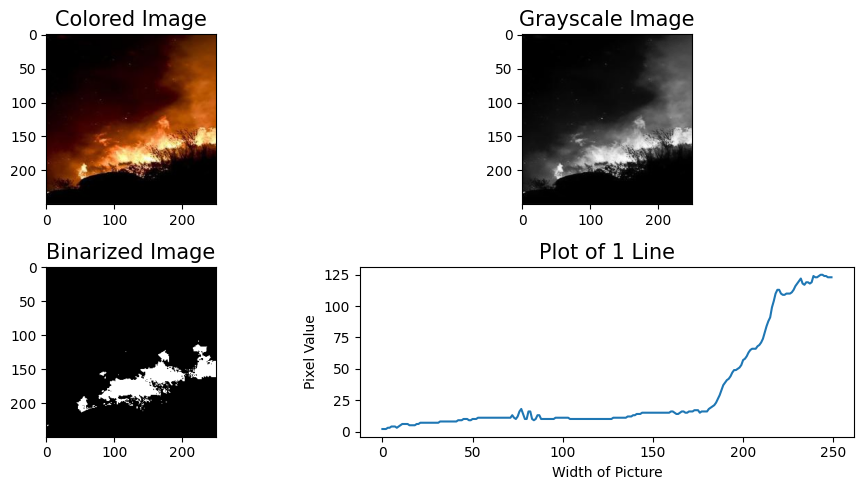

In [14]:
# Call random_image_converter function to display wildfire image
image, gray_image, binary_image = random_fire_image_converter(target_dir=train_dir)

To convert the image into binary, we applied a threshold on the pixel value as the sample plotline indicates a clear distinction within this value.

Prior to performing blob detection, we typically convert the image to binary as it simplifies processing with smaller dimensions and standardized values.

Scikit-image offers several useful functions for detecting blobs in an image, such as:

- `Laplacian of Gaussian` (LOG)
- `Difference of Gaussian` (DOG)
- `Determinant of Hessian` (DOH)

In [15]:
# Function for Blob Detection of an image
def blob_detector(img, bin_img):
    fig, ax = plt.subplots(1, 4, figsize=(10, 5))
    
    # Display image
    ax[0].set_title('Colored Image', fontsize=15)
    ax[0].imshow(img)
    
    # Display LOG of the image
    ax[1].imshow(bin_img, cmap='gray')
    blobs_log = blob_log(bin_img, max_sigma=30, threshold=0.01)
    for blob in blobs_log:
        y, x, area = blob
        ax[1].add_patch(plt.Circle((x, y), area*np.sqrt(2), color='r', 
                                fill=False))
    ax[1].set_title('Using LOG', fontsize=15)

    # Display DOG
    ax[2].imshow(bin_img, cmap='gray')
    blobs_dog = blob_dog(binary_image, max_sigma=30, threshold=0.01)
    for blobg in blobs_dog:
        y, x, area = blobg
        ax[2].add_patch(plt.Circle((x, y), area*np.sqrt(2), color='r', 
                                fill=False))
    ax[2].set_title('Using DOG', fontsize=15)
    
    # Display DOH
    ax[3].imshow(binary_image, cmap='gray')
    blobs_doh = blob_doh(bin_img, max_sigma=30, threshold=0.01)
    for blob in blobs_doh:
        y, x, area = blob
        ax[3].add_patch(plt.Circle((x, y), area*np.sqrt(2), color='r', 
                                fill=False))
    ax[3].set_title('Using DOH',fontsize=15)
    
    plt.tight_layout()
    plt.show()

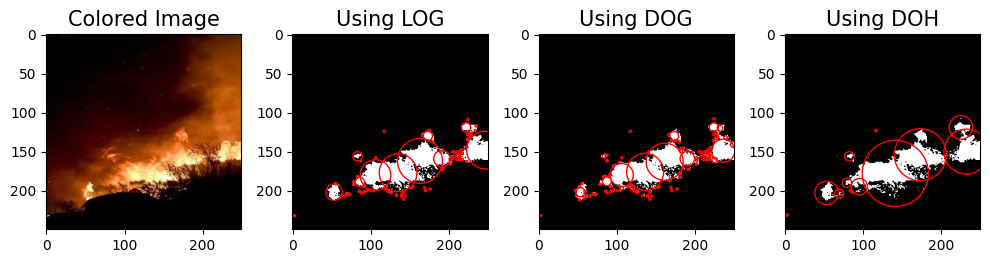

In [16]:
# Call blob_detector function
blob_detector(image, binary_image)

It's noteworthy that the LOG method successfully detects both large and small circular blobs in the image.

An examination of the results of DOG and LOG reveals that DOG is able to identify blobs that are significantly larger and have more accurate center coordinates compared to LOG.

Ultimately, when comparing the outcomes of DOH, DOG, and LOG, it can be seen that the DOH method provides more precise center coordinates for the detected blobs, specifically along the edges of the circular ground truth blobs, and it also detects a notably higher number of small blobs as compared to LOG.

Finally lets visualize non-wildfire image:

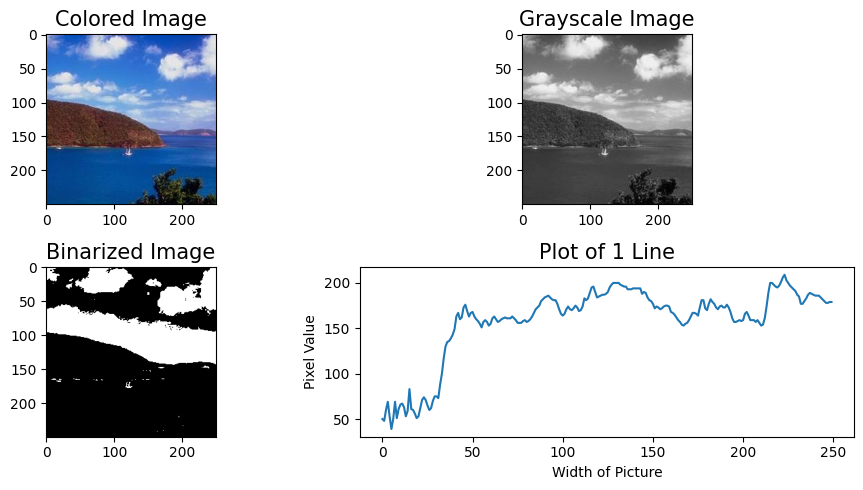

In [17]:
# Call random_image_converter function to display non-wildfire image
image, gray_image, binary_image = random_fire_image_converter(target_dir=train_dir,
                                                              target_class=class_names[1])

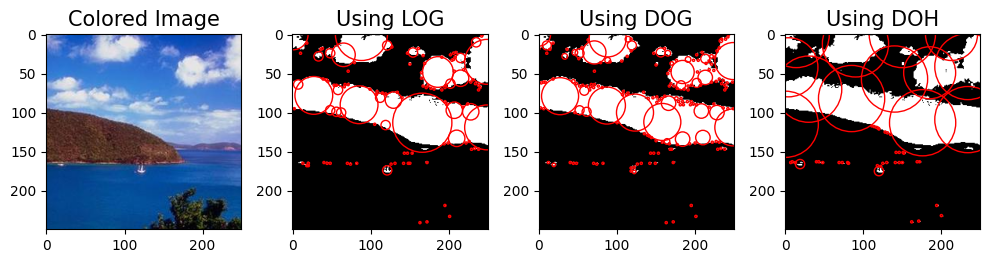

In [18]:
# Call blob_detector function to analyze non-wildfire image
blob_detector(image, binary_image)